In [26]:
from DataCleaning2 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
churn = eda('data/churn_train.csv')

In [9]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Is_iPhone,Astapor,Winterfell,King's Landing,Result
0,6.94,5.0,5.0,1.00,2014-05-03,2014-01-12,0.0,0,0,100.0,0,1,0,0,False
1,8.06,5.0,5.0,1.00,2014-01-26,2014-01-25,0.0,2,1,0.0,0,1,0,0,False
2,21.50,4.0,4.9,1.00,2014-05-21,2014-01-02,0.0,1,1,100.0,1,0,1,0,False
3,9.46,5.0,4.9,2.75,2014-01-10,2014-01-09,100.0,1,0,100.0,0,0,1,0,False
4,13.77,5.0,4.9,1.00,2014-05-13,2014-01-31,0.0,0,0,100.0,1,0,1,0,False


In [10]:
churn.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Is_iPhone,Astapor,Winterfell,King's Landing
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000
mean,5.791302,4.778335,4.650380,1.074956,8.857342,2.280700,0.376150,60.874382,0.698675,0.330900,0.465500,0.20360
std,5.708056,0.447403,0.573109,0.222427,20.014008,3.811289,0.484424,37.089619,0.458839,0.470543,0.498815,0.40268
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.00000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.000000,66.700000,1.000000,0.000000,0.000000,0.00000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,1.000000,100.000000,1.000000,1.000000,1.000000,0.00000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.00000


In [12]:
churn.groupby('Is_iPhone').mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Astapor,Winterfell,King's Landing,Result
Is_iPhone,,,,,,,,,,,,
0,5.963393,4.781482,4.683158,1.071676,8.510346,1.945159,0.321912,60.380221,0.349623,0.482453,0.167925,0.208911
1,5.717082,4.776978,4.636244,1.076370,9.006995,2.425412,0.399542,61.087505,0.322825,0.458189,0.218986,0.447776


In [13]:
churn[churn['surge_pct'] > 0].mean()

avg_dist                   4.202579
avg_rating_by_driver       4.770761
avg_rating_of_driver       4.608791
avg_surge                  1.240706
surge_pct                 28.443618
trips_in_first_30_days     4.062781
luxury_car_user            0.392983
weekday_pct               55.911978
Is_iPhone                  0.760276
Astapor                    0.335983
Winterfell                 0.410485
King's Landing             0.253532
Result                     0.583494
dtype: float64

In [15]:
churn[churn['surge_pct'] == 0].mean()

avg_dist                   6.509757
avg_rating_by_driver       4.781760
avg_rating_of_driver       4.669187
avg_surge                  1.000000
surge_pct                  0.000000
trips_in_first_30_days     1.474804
luxury_car_user            0.368538
weekday_pct               63.118490
Is_iPhone                  0.670818
Astapor                    0.328602
Winterfell                 0.490379
King's Landing             0.181019
Result                     0.281876
dtype: float64

In [55]:
range_date = (churn['last_trip_date'] - churn['signup_date'])

In [57]:
range_d = range.dt.days

In [75]:
range_no_zeros = range_d[range_d > 0]

In [73]:
range_no_zeros

0        111
2        139
4        102
5         83
6         93
8         29
11       106
12       174
14       165
16       125
17       128
18        93
19        39
21       122
22        96
24        22
25       135
27       139
28       100
29        13
30       170
31       140
32        65
33       146
34       151
35         9
36       150
37       179
38       156
39       145
        ... 
39963    178
39965    127
39966    115
39967    127
39968    150
39969    174
39970    157
39971     49
39972     20
39973    171
39974    145
39976    173
39977    162
39978     75
39979      5
39980    110
39982    109
39984     83
39986    157
39987     27
39988    144
39989    128
39991    171
39992     20
39994    162
39995     66
39996    121
39997    171
39998     32
39999    160
Length: 33279, dtype: int64

(array([5210.,  847.,  411.,  512.,  335.,  465.,  383.,  327.,  383.,
         348.,  363.,  469.,  281.,  502.,  264.,  523.,  391.,  369.,
         416.,  450.,  398.,  497.,  310.,  553.,  325.,  581.,  515.,
         445.,  560.,  512.,  672.,  718.,  567.,  759.,  621.,  891.,
         976.,  746., 1218.,  885., 1535., 1652., 1633., 1607., 1272.,
        1334., 1299.,  702.,  795.,  309.]),
 array([  1. ,   4.6,   8.2,  11.8,  15.4,  19. ,  22.6,  26.2,  29.8,
         33.4,  37. ,  40.6,  44.2,  47.8,  51.4,  55. ,  58.6,  62.2,
         65.8,  69.4,  73. ,  76.6,  80.2,  83.8,  87.4,  91. ,  94.6,
         98.2, 101.8, 105.4, 109. , 112.6, 116.2, 119.8, 123.4, 127. ,
        130.6, 134.2, 137.8, 141.4, 145. , 148.6, 152.2, 155.8, 159.4,
        163. , 166.6, 170.2, 173.8, 177.4, 181. ]),
 <a list of 50 Patch objects>)

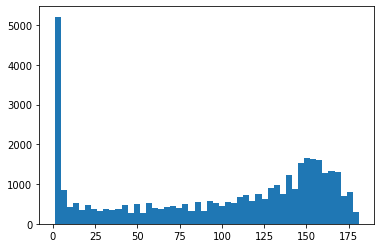

In [77]:
fig, ax = plt.subplots()

ax.hist(range_no_zeros, bins=50)

In [78]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Is_iPhone,Astapor,Winterfell,King's Landing,Result,range
0,6.94,5.0,5.0,1.00,2014-05-03,2014-01-12,0.0,0,0,100.0,0,1,0,0,False,111 days
1,8.06,5.0,5.0,1.00,2014-01-26,2014-01-25,0.0,2,1,0.0,0,1,0,0,False,1 days
2,21.50,4.0,4.9,1.00,2014-05-21,2014-01-02,0.0,1,1,100.0,1,0,1,0,False,139 days
3,9.46,5.0,4.9,2.75,2014-01-10,2014-01-09,100.0,1,0,100.0,0,0,1,0,False,1 days
4,13.77,5.0,4.9,1.00,2014-05-13,2014-01-31,0.0,0,0,100.0,1,0,1,0,False,102 days


In [79]:
new_churn = churn.drop(axis=1,columns=['Result', 'last_trip_date', 'signup_date', 'range'])

In [80]:
#make a new column in new data frame
new_churn['date_range'] = range_d

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128f1ef98>,
      dtype=object)

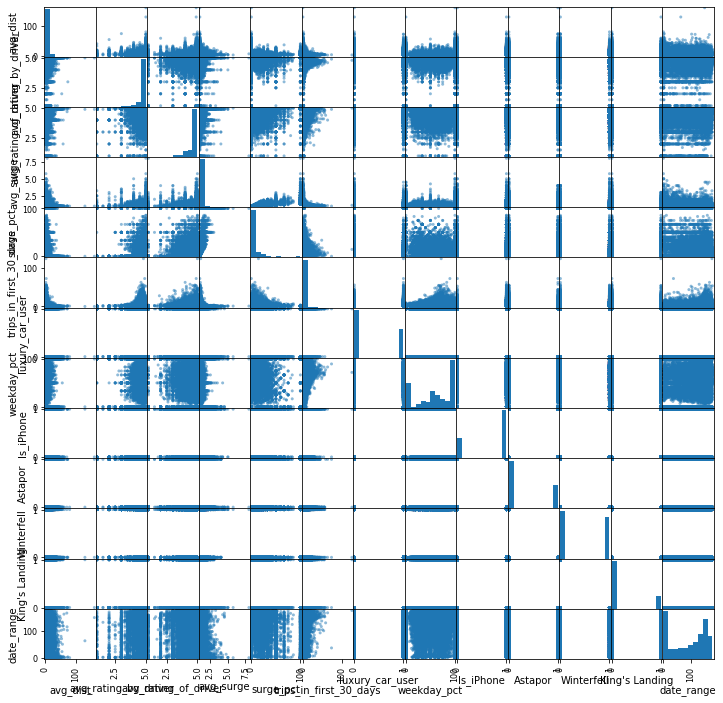

In [85]:
pd.plotting.scatter_matrix(new_churn, figsize=(12,12))



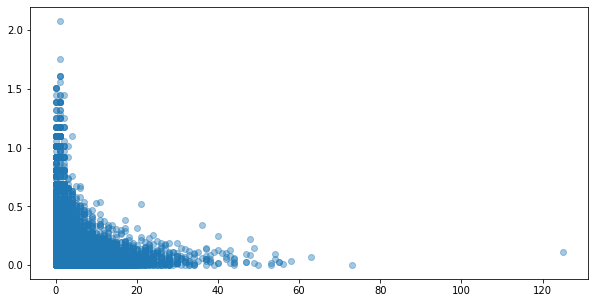

In [124]:
fig, ax = plt.subplots(figsize=(10,5))


ax.scatter(new_churn['trips_in_first_30_days'], np.log(new_churn['avg_surge']), alpha=.4)


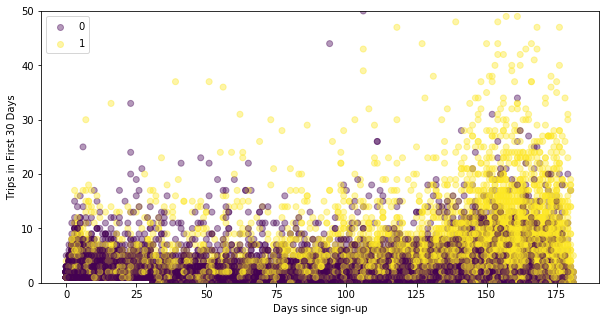

In [132]:
has_surge = (churn['surge_pct'] > 0)

fig, ax = plt.subplots(figsize=(10,5))

#z = np.polyfit(new_churn['date_range'],new_churn['trips_in_first_30_days'], 1)
#p = np.poly1d(z)
scatter = ax.scatter(new_churn['date_range'],new_churn['trips_in_first_30_days'], c=has_surge, alpha=.4)
#ax.plot(new_churn['date_range'][has_surge],p(new_churn['date_range'][has_surge]), lw=5)
#ax.plot(new_churn['date_range'][~has_surge],p(new_churn['date_range'][~has_surge]), lw=5)
ax.set_ylim(0,50)
ax.set_ylabel('Trips in First 30 Days', fontsize=10)
ax.set_xlabel('Days since sign-up', fontsize=10)
ax.legend(*scatter.legend_elements())

This chart seems to tell me that people who pay surge tend to retain longer as customers.... 

Assumptions 

Each ride = 10 dollars 
Surge Coupon 5 dollars off one ride 
If you lose surge rider you lose 4 rides, taking first 30 day avg as an assumption


Surge Coupon Cost/Benefit  Matrix 
-5(churned, sent coupon), 35 (spent 5 though you did't need to)
5(churned but saved 5 bucks by no coupon, 40 (didn't spend anything)    


In [143]:
#Example: 

confusion = np.array([[250,35],[40, 100]]) 
cb = np.array([[-5, 35], [0,35]])


In [141]:
(confusion * cb)

array([[-1250,  1225],
       [    0,  4000]])

In [142]:
(confusion * cb).sum()

3975